In [1]:
from search import *
from notebook import psource, heatmap, gaussian_kernel, show_map, final_path_colors, display_visual, plot_NQueens

# Needed to hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import lines

from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import time

In [3]:
nome = 'Bruno Camerin Santarem'
ra = '191150193'

In [4]:
interior_map = UndirectedGraph(dict(
    Americana=dict(Campinas=188,Limeira=120,Piracicaba=190),
    Amparo=dict(Bragança_Paulista=198),
    Araras=dict(Leme=100,Rio_Claro=104,Mogi_Mirim=661,Limeira=120),
    Atibaia=dict(Mairiporã=121,Bragança_Paulista=500),
    Bragança_Paulista=dict(Campinas=710),
    Campinas=dict(Jundiaí=758,Itu=625),
    Capivari=dict(Itu=574,Piracicaba=178),
    Charqueada=dict(Rio_Claro=143,Piracicaba=152),
    Itu=dict(Sorocaba=344,São_Paulo=810,Porto_Feliz=143),
    Jaguariúna=dict(Mogi_Mirim=171,Amparo=140),
    Jundiaí=dict(São_Paulo=266),
    Limeira=dict(Rio_Claro=127,Piracicaba=172),
    Mairiporã=dict(São_Paulo=143,Jundiaí=196),
    Mogi_Mirim=dict(Limeira=674),
    #Piracicaba=dict(Tietê=631),
    #Adicionar cidade: Rio das Pedras
    Rio_das_Pedras=dict(Tietê=500, Piracicaba=631),
    Porto_Feliz=dict(Tietê=125,Itu=143),
    Rio_Claro=dict(São_Carlos=312,Piracicaba=196),
    Sorocaba=dict(Porto_Feliz=247,São_Paulo=1100),
    Tatuí=dict(Tietê=174,Sorocaba=94)))


interior_map.locations = dict(
    Americana=(34,89),
    Amparo=(108,91),
    Araras=(30,112),
    Atibaia=(120,26),
    Bragança_Paulista=(121,76),
    Campinas=(50,79),
    Capivari=(23,74),
    Charqueada=(7,103),
    Itu=(36,18),
    Jaguariúna=(94,91),
    Jundiaí=(100,22),
    Leme=(30,122),
    Limeira=(29,100),
    Mairiporã=(118,14),
    Mogi_Mirim=(96,108),
    Piracicaba=(15,90),
    Porto_Feliz=(22,21),
    Rio_das_Pedras=(13,74),
    Rio_Claro=(20,109),
    Sorocaba=(5,3),
    São_Carlos=(0,133),
    São_Paulo=(115,0),
    Tatuí=(2,12),
    Tietê=(11,27))

In [5]:
caipira_problem = make_caipira_problem(ra,interior_map)
print('De',caipira_problem.initial,'até',caipira_problem.goal)

De São_Carlos até São_Paulo


In [6]:
interior_locations = interior_map.locations
print(interior_locations)

{'Americana': (34, 89), 'Amparo': (108, 91), 'Araras': (30, 112), 'Atibaia': (120, 26), 'Bragança_Paulista': (121, 76), 'Campinas': (50, 79), 'Capivari': (23, 74), 'Charqueada': (7, 103), 'Itu': (36, 18), 'Jaguariúna': (94, 91), 'Jundiaí': (100, 22), 'Leme': (30, 122), 'Limeira': (29, 100), 'Mairiporã': (118, 14), 'Mogi_Mirim': (96, 108), 'Piracicaba': (15, 90), 'Porto_Feliz': (22, 21), 'Rio_das_Pedras': (13, 74), 'Rio_Claro': (20, 109), 'Sorocaba': (5, 3), 'São_Carlos': (0, 133), 'São_Paulo': (115, 0), 'Tatuí': (2, 12), 'Tietê': (11, 27)}


Vamos começar inicializando um grafo vazio. Nós adicionaremos nós, posicionaremos os nós em suas localizações mostradas no livro, e adicionaremos vértices ao grafo.

In [7]:
# node colors, node positions and node label positions
node_colors = {node: 'white' for node in interior_map.locations.keys()}
'''Itera sobre todas as cidades(nodes) e cria um dicionário no formato CIDADE:COR
   neste caso, todas as cidades são inicializadas com a cor branca'''

node_positions = interior_map.locations
node_label_pos = { k:[v[0]-2,v[1]+5]  for k,v in interior_map.locations.items() }
'''Itera sobre todos os itens(chave:valor) do dicionário ROMANIA_MAP e cria um novo
   dicionário com a estrutura CIDADE:[COORD.X , COORD.Y-10]'''

edge_weights = {(k, k2) : v2 for k, v in interior_map.graph_dict.items() for k2, v2 in v.items()}
'''Itera sobre todos os itens do grafo presentes no dicionário de ROMANIA_MAP e cria um novo
   dicionário com a estrutura (CIDADE1,CIDADE2):DISTÂNCIA'''

interior_graph_data = {  'graph_dict' : interior_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }

Nós completamos a construção de nosso grafo baseado em `romania_map` e suas localizações. É hora de exibi-lo nesse *notebook*. A função `show_map(node_colors)` nos ajuda a fazer isso. Nós chamaremos essa função futuramente para exibir o mapa em cada passo da iteração de busca, fazendo uso de vários algoritmos presentes no livro.

Nós podemos simplesmente chamar a função com o objeto dicionário **node_colors** para a exibição.

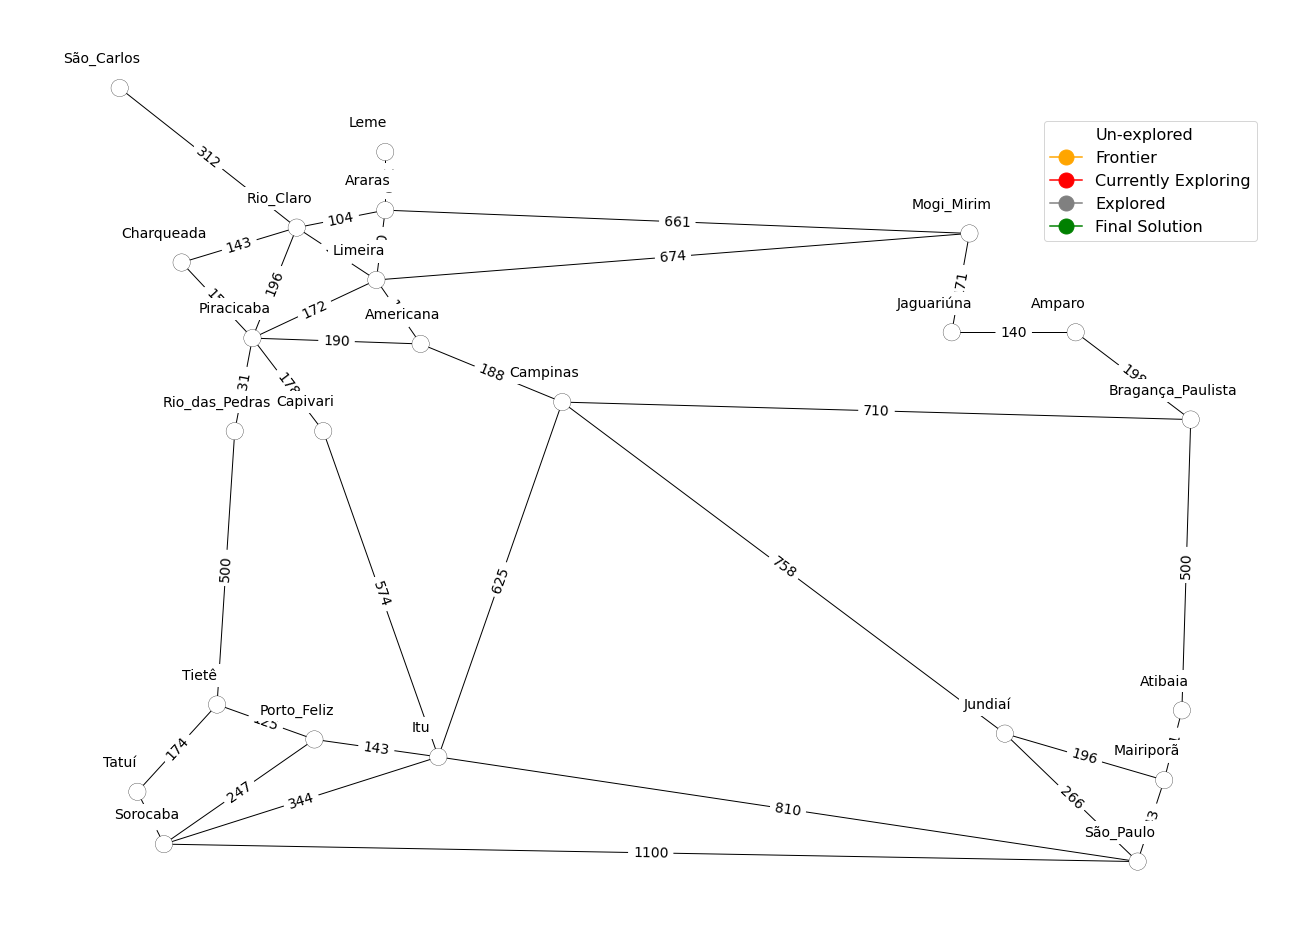

In [8]:
show_map(interior_graph_data)

Voila! Temos uma parte do mapa do interior de São Paulo. Agora, vamos ver como diferentes algoritmos de busca se comportam.

## 1. BUSCA POR PROFUNDIDADE EM GRAFO

In [9]:
def depth_first_graph_search(problem):
    """Search the deepest nodes in the search tree first.
        Search through the successors of a problem to find a goal.
        The argument frontier should be an empty queue.
        Does not get trapped by loops.
        If two paths reach a state, only use the first one. [Figure 3.7]"""
    frontier = [(Node(problem.initial))]  # Stack
    explored = set()
    while frontier:
        print('Fronteiras:\t',frontier)
        node = frontier.pop()
        '''
        SE profundiadeDoNó < Constante:
            ação
            ação
            ...
            ação
        SENÃO
            retorna Null
        '''
        
        print('Expandido:\t',node,'\n')
        if problem.goal_test(node.state):
            return node
        explored.add(node.state)
        frontier.extend(child for child in node.expand(problem)
                        if child.state not in explored and
                        child not in frontier)
    return None

In [10]:
depth_first_graph_search(caipira_problem)

Fronteiras:	 [<Node São_Carlos>]
Expandido:	 <Node São_Carlos> 

Fronteiras:	 [<Node Rio_Claro>]
Expandido:	 <Node Rio_Claro> 

Fronteiras:	 [<Node Piracicaba>, <Node Araras>, <Node Charqueada>, <Node Limeira>]
Expandido:	 <Node Limeira> 

Fronteiras:	 [<Node Piracicaba>, <Node Araras>, <Node Charqueada>, <Node Americana>, <Node Mogi_Mirim>]
Expandido:	 <Node Mogi_Mirim> 

Fronteiras:	 [<Node Piracicaba>, <Node Araras>, <Node Charqueada>, <Node Americana>, <Node Jaguariúna>]
Expandido:	 <Node Jaguariúna> 

Fronteiras:	 [<Node Piracicaba>, <Node Araras>, <Node Charqueada>, <Node Americana>, <Node Amparo>]
Expandido:	 <Node Amparo> 

Fronteiras:	 [<Node Piracicaba>, <Node Araras>, <Node Charqueada>, <Node Americana>, <Node Bragança_Paulista>]
Expandido:	 <Node Bragança_Paulista> 

Fronteiras:	 [<Node Piracicaba>, <Node Araras>, <Node Charqueada>, <Node Americana>, <Node Campinas>, <Node Atibaia>]
Expandido:	 <Node Atibaia> 

Fronteiras:	 [<Node Piracicaba>, <Node Araras>, <Node Charquead

<Node São_Paulo>

In [11]:
def graph_search_for_vis(problem):
    """Search through the successors of a problem to find a goal.
    The argument frontier should be an empty queue.
    If two paths reach a state, only use the first one. [Figure 3.7]"""
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    frontier = [(Node(problem.initial))]
    explored = set()
    
    # modify the color of frontier nodes to orange
    node_colors[Node(problem.initial).state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
      
    while frontier:
        # Popping first node of stack
        node = frontier.pop()
        
        if node.depth > 15:
            return None
        '''
        SE profundiadeDoNó < Constante:
            ação
            ação
            ...
            ação
        SENÃO
            retorna Null
        '''
        
        # modify the currently searching node to red
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            # modify goal node to green after reaching the goal
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        explored.add(node.state)
        frontier.extend(child for child in node.expand(problem)
                        if child.state not in explored and
                        child not in frontier)
        
        for n in frontier:
            # modify the color of frontier nodes to orange
            node_colors[n.state] = "orange"
            iterations += 1
            all_node_colors.append(dict(node_colors))

        # modify the color of explored nodes to gray
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
    return None


def depth_first_graph_search(problem):
    """Search the deepest nodes in the search tree first."""
    iterations, all_node_colors, node = graph_search_for_vis(problem)
    return(iterations, all_node_colors, node)

In [12]:
all_node_colors = []
display_visual(interior_graph_data, user_input=False, 
               algorithm=depth_first_graph_search, 
               problem=caipira_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

## 2. BUSCA POR LARGURA EM GRAFO

In [24]:
def breadth_first_graph_search(problem):
    """[Figure 3.11]
    Note that this function can be implemented in a
    single line as below:
    return graph_search(problem, FIFOQueue())
    """
    node = Node(problem.initial)
    if problem.goal_test(node.state):
        return node
    frontier = deque([node])
    explored = set()
    while frontier:
        print('Fronteiras:\t',frontier)
        node = frontier.popleft()
        print('Expandido:\t',node,'\n')
        explored.add(node.state)
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                if problem.goal_test(child.state):
                    return child
                frontier.append(child)
    return None

In [25]:
breadth_first_graph_search(caipira_problem)

Fronteiras:	 deque([<Node São_Carlos>])
Expandido:	 <Node São_Carlos> 

Fronteiras:	 deque([<Node Rio_Claro>])
Expandido:	 <Node Rio_Claro> 

Fronteiras:	 deque([<Node Piracicaba>, <Node Araras>, <Node Charqueada>, <Node Limeira>])
Expandido:	 <Node Piracicaba> 

Fronteiras:	 deque([<Node Araras>, <Node Charqueada>, <Node Limeira>, <Node Americana>, <Node Capivari>, <Node Rio_das_Pedras>])
Expandido:	 <Node Araras> 

Fronteiras:	 deque([<Node Charqueada>, <Node Limeira>, <Node Americana>, <Node Capivari>, <Node Rio_das_Pedras>, <Node Leme>, <Node Mogi_Mirim>])
Expandido:	 <Node Charqueada> 

Fronteiras:	 deque([<Node Limeira>, <Node Americana>, <Node Capivari>, <Node Rio_das_Pedras>, <Node Leme>, <Node Mogi_Mirim>])
Expandido:	 <Node Limeira> 

Fronteiras:	 deque([<Node Americana>, <Node Capivari>, <Node Rio_das_Pedras>, <Node Leme>, <Node Mogi_Mirim>])
Expandido:	 <Node Americana> 

Fronteiras:	 deque([<Node Capivari>, <Node Rio_das_Pedras>, <Node Leme>, <Node Mogi_Mirim>, <Node Campi

<Node São_Paulo>

In [26]:
def breadth_first_search_graph(problem):
    "[Figure 3.11]"
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
      
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return(iterations, all_node_colors, node)
    
    frontier = deque([node])
    
    # modify the color of frontier nodes to blue
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
        
    explored = set()
    while frontier:
        node = frontier.popleft()
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        explored.add(node.state)     
        
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                if problem.goal_test(child.state):
                    node_colors[child.state] = "green"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))
                    return(iterations, all_node_colors, child)
                frontier.append(child)

                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
                    
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None

In [27]:
all_node_colors = []
display_visual(interior_graph_data, user_input=False, 
               algorithm=breadth_first_search_graph, 
               problem=caipira_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

## BEST FIRST

Vamos declarar a função geral Best First

In [28]:
def best_first_graph_search_for_vis(problem, f):
    """Search the nodes with the lowest f scores first.
    You specify the function f(node) that you want to minimize; for example,
    if f is a heuristic estimate to the goal, then we have greedy best
    first search; if f is node.depth then we have breadth-first search.
    There is a subtlety: the line "f = memoize(f, 'f')" means that the f
    values will be cached on the nodes as they are computed. So after doing
    a best first search you can examine the f values of the path returned."""
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    f = memoize(f, 'f')
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return(iterations, all_node_colors, node)
    
    frontier = PriorityQueue('min', f)
    frontier.append(node)
    
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    explored = set()
    while frontier:
        node = frontier.pop()
        
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        explored.add(node.state)
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                frontier.append(child)
                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
            elif child in frontier:
                incumbent = frontier[child]
                if f(child) < f(incumbent):
                    del frontier[incumbent]
                    frontier.append(child)
                    node_colors[child.state] = "orange"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))

        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None

## 3. BUSCA BEST FIRST GULOSA

In [29]:
def greedy_best_first_search(problem, h=None):
    """Greedy Best-first graph search is an informative searching algorithm with f(n) = h(n).
    You need to specify the h function when you call best_first_search, or
    else in your Problem subclass."""
    h = memoize(h or problem.h, 'h')
    iterations, all_node_colors, node = best_first_graph_search_for_vis(problem, lambda n: h(n))
    return(iterations, all_node_colors, node)


In [30]:
all_node_colors = []
display_visual(interior_graph_data, user_input=False, 
               algorithm=greedy_best_first_search, 
               problem=caipira_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

## 4. BUSCA DE CUSTO UNIFORME (BRANCH AND BOUND)

In [31]:
def uniform_cost_search_graph(problem):
    "[Figure 3.14]"
    #Uniform Cost Search uses Best First Search algorithm with f(n) = g(n)
    iterations, all_node_colors, node = best_first_graph_search_for_vis(problem, lambda node: node.path_cost)
    return(iterations, all_node_colors, node)


In [32]:
all_node_colors = []
display_visual(interior_graph_data, user_input=False, 
               algorithm=uniform_cost_search_graph, 
               problem=caipira_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

## 8. BUSCA A\*

In [33]:
def astar_search_graph(problem, h=None):
    """A* search is best-first graph search with f(n) = g(n)+h(n).
    You need to specify the h function when you call astar_search, or
    else in your Problem subclass."""
    h = memoize(h or problem.h, 'h')
    iterations, all_node_colors, node = best_first_graph_search_for_vis(problem, 
                                                                lambda n: n.path_cost + h(n))
    return(iterations, all_node_colors, node)


In [34]:
all_node_colors = []
display_visual(interior_graph_data, user_input=False, 
               algorithm=astar_search_graph, 
               problem=caipira_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…